In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OrdinalEncoder

In [2]:
# Chargement et aperçu des données
df = pd.read_csv('dataset/annonces_immo.csv')

In [3]:
def percent_missing(df):
    """Calculer le pourcentage de valeurs manquantes par colonne"""
    percent_nan = (df.isnull().sum() / len(df)) * 100
    percent_nan = percent_nan[percent_nan > 0].sort_values()
    return percent_nan

In [4]:
df.head(3)

,Lien,Prix,Prix_par_m2,Type,Meuble,Surface_totale,Surface_sejour_m2,Nb_pieces,Nb_chambres,Nb_salles_bain,...,Depense_min,Depense_max,Annee_reference_dpe,Date_diagnostic,Date_pub,Date_mise_jour,Ref_agence,Ref_superimmo,Description,Images
0,https://www.superimmo.com/annonces/achat-appar...,219 000 €,5475.0,Appartement,True,40 m²,13.0,2.0,1.0,1.0,...,NaN,NaN,NaN,NaN,2025-04-26,NaN,VA2095-COMPANY36707JGV,ANVXYEC8K,Appartement T2 Charme et Confort Appartement n...,"[""https://photo.superimmo.com/19nhjvvinmoartdw..."
1,https://www.superimmo.com/annonces/achat-appar...,199 000 €,2653.0,Appartement,NaN,75 m²,NaN,3.0,2.0,1.0,...,NaN,NaN,5256.0,2025-01-24,2025-04-25,NaN,5256,ANVXYE01C,EXCLUSIVITE : Votre Agence My HOME vous présen...,"[""https://photo.superimmo.com/6mmp6vnq7y21xwyt..."
2,https://www.superimmo.com/annonces/achat-appar...,335 000 €,10152.0,Appartement,NaN,33 m²,NaN,2.0,1.0,1.0,...,860.0,1200.0,2023.0,2024-02-10,2025-04-26,NaN,ZXEN-HZD-RUC,ANVXYEIE5,"À vendre – Rue du Faubourg du Temple, 75011 Pa...","[""https://photo.superimmo.com/14x1ucbzbbdeff1b..."


In [5]:
df.shape

(2820, 40)

In [6]:
#Informations sur le DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2820 entries, 0 to 2819
Data columns (total 40 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Lien                     2820 non-null   object 
 1   Prix                     2820 non-null   object 
 2   Prix_par_m2              2809 non-null   float64
 3   Type                     2820 non-null   object 
 4   Meuble                   298 non-null    object 
 5   Surface_totale           2813 non-null   object 
 6   Surface_sejour_m2        892 non-null    float64
 7   Nb_pieces                2814 non-null   float64
 8   Nb_chambres              2461 non-null   float64
 9   Nb_salles_bain           1658 non-null   float64
 10  Nb_wc                    1656 non-null   float64
 11  Agence                   2820 non-null   object 
 12  Ville                    2820 non-null   object 
 13  Orientation              824 non-null    object 
 14  Charges_annuelles       

In [7]:
percent_nan = percent_missing(df)
percent_nan

Nb_pieces                   0.212766
Date_pub                    0.212766
Description                 0.212766
Ref_superimmo               0.212766
Ref_agence                  0.248227
Surface_totale              0.248227
Prix_par_m2                 0.390071
Classe_emission_CO2         8.475177
Emission_CO2_kgeq_m2_an     9.964539
Conso_energie_kWh_m2_an    10.070922
Classe_energie             11.914894
Nb_chambres                12.730496
Date_mise_jour             14.751773
Date_diagnostic            19.397163
Annee_construction         32.659574
Depense_min                35.283688
Depense_max                35.886525
Charges_annuelles          39.397163
Nb_salles_bain             41.205674
Nb_wc                      41.276596
Annee_reference_dpe        44.893617
Copro_nb_lots              48.014184
Parking                    56.914894
Num_etage_logement         60.496454
Etage_total                60.496454
Type_chauffage             61.312057
Cave                       66.737589
S

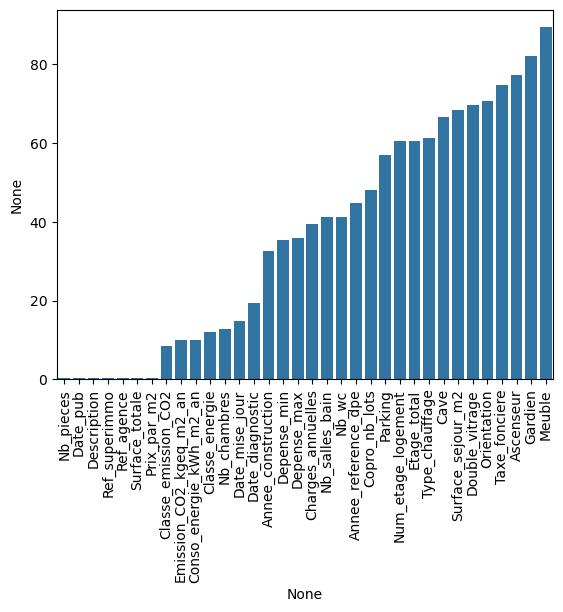

In [8]:
sns.barplot(x=percent_nan.index, y=percent_nan)
plt.xticks(rotation=90)
plt.show()

In [9]:
# Suppression de la colonne 'Lien' qui n'apporte pas d'information utile pour l'analyse
df.drop(columns=['Lien'], inplace=True)
# Suppression de la colonne 'Prix_par_m2' qui est redondante avec 'Prix' et 'Surface_totale'
df.drop(columns=['Prix_par_m2'], inplace=True)
# Suppression de la colonne 'Meuble' avec 89.4% de NaN (données non exploitables)
df.drop(columns=['Meuble'], inplace=True)
# Suppression de la colonne 'Surface_sejour_m2' avec 68.4% de NaN (données non exploitables)
df.drop(columns=['Surface_sejour_m2'], inplace=True)
# Suppression de la colonne 'Agence' qui n'apporte pas d'information utile pour l'analyse
df.drop(columns=['Agence'], inplace=True)
# Suppression de la colonne 'Orientation' avec 70.8% de NaN (données non exploitables)
df.drop(columns=['Orientation'], inplace=True)
# Suppression de la colonne 'Taxe_fonciere' avec 74.8% de NaN (données non exploitables)
df.drop(columns=['Taxe_fonciere'], inplace=True)
# Suppression de la colonne 'Images'(données non exploitables)
df.drop(columns=['Images'], inplace=True)
# Suppression de la colonne 'Description'(données non exploitables)
df.drop(columns=['Description'], inplace=True)
# Suppression de la colonne 'Ref_superimmo'(données non exploitables)
df.drop(columns=['Ref_superimmo'], inplace=True)
# Suppression de la colonne 'Ref_agence'(données non exploitables)
df.drop(columns=['Ref_agence'], inplace=True)
# Suppression de la colonne 'Date_mise_jour'(données non exploitables)
df.drop(columns=['Date_mise_jour'], inplace=True)
# Suppression de la colonne 'Date_pub'(données non exploitables)
df.drop(columns=['Date_pub'], inplace=True)
# Suppression de la colonne 'Depense_min'(données non exploitables)
df.drop(columns=['Depense_min'], inplace=True)
# Suppression de la colonne 'Depense_max'(données non exploitables)
df.drop(columns=['Depense_max'], inplace=True)
# Suppression de la colonne 'Type_chauffage'car 61% de NaNet possèdent des valeurs aberrantes
df.drop(columns=['Type_chauffage'], inplace=True)
# Suppression de la colonne 'Date_diagnostic'car trop de valeurs manquantes
df.drop(columns=['Date_diagnostic'], inplace=True)
# Suppression de la colonne 'Annee_reference_dpe'car trop de valeurs manquantes
df.drop(columns=['Annee_reference_dpe'], inplace=True)
# Suppression de la colonne 'Double_vitrage'car trop de valeurs manquantes
df.drop(columns=['Double_vitrage'], inplace=True)
# Suppression de la colonne 'Gardien'car trop de valeurs manquantes
df.drop(columns=['Gardien'], inplace=True)
# Suppression de la colonne 'Ascenseur'car trop de valeurs manquantes
df.drop(columns=['Ascenseur'], inplace=True)
# Suppression de la colonne 'Num_etage_logement'car trop de valeurs manquantes
df.drop(columns=['Num_etage_logement'], inplace=True)
# Suppression de la colonne 'Etage_total'car trop de valeurs manquantes
df.drop(columns=['Etage_total'], inplace=True)
# Suppression de la colonne 'Annee_construction'car trop de valeurs manquantes
df.drop(columns=['Annee_construction'], inplace=True)
# Suppression de la colonne 'Copro_nb_lots'car trop de valeurs manquantes
df.drop(columns=['Copro_nb_lots'], inplace=True)

In [10]:
# Suppression des nan de la colonne 'Surface_totale' car 0.25% de NaN seulement
df = df.dropna(subset=['Surface_totale'])
# Suppression des nan de la colonne 'Nb_pieces' car 0.18% de NaN seulement
df = df.dropna(subset=['Nb_pieces'])

In [11]:
# La colonne 'Nb_chambres' a 12.57% de NaN, on peut les imputer avec la médiane
df['Nb_chambres'] = df.groupby('Nb_pieces')['Nb_chambres'].transform(lambda x: x.fillna(x.dropna().median()))
# Suppression des lignes restantes avec des NaN dans 'Nb_chambres'
df = df.dropna(subset=['Nb_chambres'])

In [12]:
# La colonne 'Nb_salles_bain' a 41.3% de NaN, on peut les imputer avec la médiane
df['Nb_salles_bain'] = df.groupby('Nb_pieces')['Nb_salles_bain'].transform(lambda x: x.fillna(x.dropna().median()))
# Suppression des lignes restantes avec des NaN dans 'Nb_salles_bain'
df = df.dropna(subset=['Nb_salles_bain'])

In [13]:
# La colonne 'Nb_wc' a 41.3% de NaN, on peut les imputer avec la médiane
df['Nb_wc'] = df.groupby('Nb_pieces')['Nb_wc'].transform(lambda x: x.fillna(x.dropna().median()))
# Suppression des lignes restantes avec des NaN dans 'Nb_wc'
df = df.dropna(subset=['Nb_wc'])

In [14]:
# Nouvelles colonnes.
corrections_ville = {
    'Saint-Maur-des-Fossés': 'Saint-Maur-des-Fossés (94100)',
    'Saint-Denis': 'Saint-Denis (93200)',
    'Évry-Courcouronnes': 'Évry-Courcouronnes (91000)',
    'Paris (75)': 'Paris (75001)',
    'Meudon': 'Meudon (92190)',
    "Val-d'Oise (95)": "Cergy (95000)",
    "Val-de-Marne (94)": "Créteil (94000)"
}

for ville_incorrecte, ville_corrigee in corrections_ville.items():
    df.loc[df['Ville'] == ville_incorrecte, 'Ville'] = ville_corrigee

df['Ville_Nom'] = df['Ville'].str.split('(').str[0].str.strip()
df['Code_Postal'] = df['Ville'].str.extract(r'\((\d{5})\)')[0]
df['Departement'] = df['Code_Postal'].str[:2]

# Suppression de la colonne 'Ville' originale
df.drop(columns=['Ville'], inplace=True)

In [15]:
# Copie de la colonne avant conversion
surface_originale = df['Surface_totale'].copy()
# Nettoyage de la colonne 'Surface_totale'
df['Surface_totale'] = df['Surface_totale'].str.replace(' m²', '')
# Il faut aussi changer les "," en "." et supprimer les valeurs qui ne sont pas convertibles en float
df['Surface_totale'] = df['Surface_totale'].str.replace(',', '.')
df['Surface_totale'] = pd.to_numeric(df['Surface_totale'], errors='coerce')
# Valeurs non convertissables
valeurs_non_converties = surface_originale[df['Surface_totale'].isna()]
pd.set_option('display.max_rows', None)
display(valeurs_non_converties)
pd.reset_option('display.max_rows')
# cela supprime pas mal de lignes car dans cette colonne il y a vait aussi la surface du tearrain 'Ter. 1 300'
df = df.dropna(subset=['Surface_totale'])

9          Ter. 389 m²
40         Ter. 283 m²
43       Ter. 1 997 m²
45         Ter. 180 m²
58         Ter. 395 m²
85         Ter. 359 m²
92         Ter. 200 m²
108        Ter. 653 m²
124        Ter. 428 m²
153        Ter. 115 m²
154        Ter. 300 m²
156        Ter. 258 m²
163        Ter. 322 m²
174        Ter. 419 m²
182        Ter. 803 m²
195      Ter. 1 575 m²
204        Ter. 257 m²
222         Ter. 23 m²
223        Ter. 243 m²
231         Ter. 40 m²
236        Ter. 828 m²
243         Ter. 77 m²
253         Ter. 60 m²
271        Ter. 509 m²
283      Ter. 1 000 m²
288        Ter. 399 m²
289        Ter. 230 m²
293        Ter. 197 m²
301        Ter. 750 m²
313      Ter. 1 127 m²
333      Ter. 2 310 m²
334        Ter. 500 m²
335        Ter. 500 m²
343      Ter. 1 080 m²
345        Ter. 289 m²
354        Ter. 436 m²
357        Ter. 102 m²
363        Ter. 320 m²
365        Ter. 203 m²
375        Ter. 600 m²
384         Ter. 71 m²
397         Ter. 80 m²
398        Ter. 534 m²
414      Te

In [16]:
# Copie de la colonne avant conversion
prix_originale = df['Prix'].copy()
# Nettoyage de la colonne 'Prix'
df['Prix'] = df['Prix'].str.replace(' €', '').str.replace(' ', '')
df['Prix'] = df['Prix'].str.replace(',', '.')
df['Prix'] = pd.to_numeric(df['Prix'], errors='coerce')
# Valeurs non convertissables
valeurs_non_converties = prix_originale[df['Prix'].isna()]
pd.set_option('display.max_rows', None)
display(valeurs_non_converties)
pd.reset_option('display.max_rows')
df = df.dropna(subset=['Prix'])

2116    Nous contacter
2316    Nous contacter
2428    Nous contacter
Name: Prix, dtype: object

In [17]:
# La colonne 'Charges_annuelles' : imputation par la médiane avec tranches de surface
# Créer des tranches de surface pour regrouper les valeurs similaires
df['Surface_Tranche'] = pd.cut(
    df['Surface_totale'],
    bins=[0, 30, 50, 75, 100, 150, 350],
    labels=['0-30', '30-50', '50-75', '75-100', '100-150', '150-350']
)
# La colonne 'Charges_annuelles' : imputation par la médiane
df['Charges_annuelles'] = df.groupby(['Type', 'Surface_Tranche', 'Departement'], observed=True)['Charges_annuelles'].transform(
    lambda x: x.fillna(x.dropna().median())
)
df['Charges_annuelles'] = df.groupby(['Type', 'Surface_Tranche'], observed=True)['Charges_annuelles'].transform(
    lambda x: x.fillna(x.dropna().median())
)
# Suppression de la colonne 'Surface_Tranche' qui n'est plus nécessaire
df.drop(columns=['Surface_Tranche'], inplace=True)

In [18]:
# Suppression des nan des colonnes suivantes.
df = df.dropna(subset=['Classe_emission_CO2'])
df = df.dropna(subset=['Classe_energie'])
df = df.dropna(subset=['Conso_energie_kWh_m2_an'])

In [19]:
# Pour la colonne 'Cave', on remplace les "Nan" par 0 et les "true" par 1
df['Cave'] = df['Cave'].map({True: 1, False: 0, np.nan: 0}).astype(int)
# Pour la colonne 'Parking', on remplace les "Nan" par 0 et les "true" par 1
df['Parking'] = df['Parking'].map({True: 1, False: 0, np.nan: 0}).astype(int)

In [20]:
# Suppression de la colonne 'Ville_Nom'car redondant
df.drop(columns=['Ville_Nom'], inplace=True)
# Suppression de la colonne 'Departement'car redondant
df.drop(columns=['Departement'], inplace=True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2158 entries, 1 to 2814
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Prix                     2158 non-null   float64
 1   Type                     2158 non-null   object 
 2   Surface_totale           2158 non-null   float64
 3   Nb_pieces                2158 non-null   float64
 4   Nb_chambres              2158 non-null   float64
 5   Nb_salles_bain           2158 non-null   float64
 6   Nb_wc                    2158 non-null   float64
 7   Charges_annuelles        2158 non-null   float64
 8   Cave                     2158 non-null   int64  
 9   Parking                  2158 non-null   int64  
 10  Classe_energie           2158 non-null   object 
 11  Conso_energie_kWh_m2_an  2158 non-null   float64
 12  Classe_emission_CO2      2158 non-null   object 
 13  Emission_CO2_kgeq_m2_an  2158 non-null   float64
 14  Code_Postal              2158

In [22]:
df.corr(numeric_only=True)['Prix'].sort_values()

Parking                   -0.077558
Charges_annuelles          0.005178
Conso_energie_kWh_m2_an    0.045881
Emission_CO2_kgeq_m2_an    0.066220
Cave                       0.067491
Nb_salles_bain             0.258294
Nb_chambres                0.332071
Nb_wc                      0.420270
Nb_pieces                  0.443561
Surface_totale             0.635713
Prix                       1.000000
Name: Prix, dtype: float64

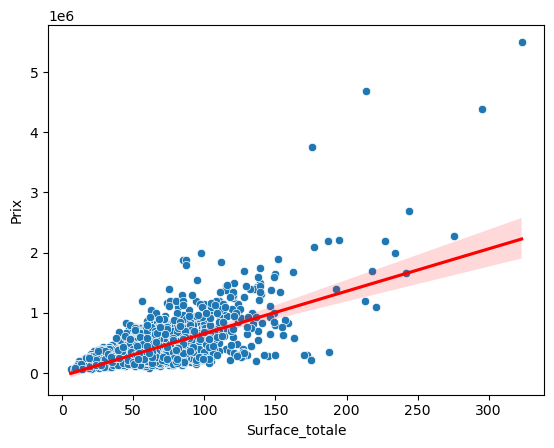

In [23]:
sns.scatterplot(x='Surface_totale', y='Prix', data=df)
sns.regplot(x='Surface_totale', y='Prix', data=df, scatter=False, color='red')
plt.show()

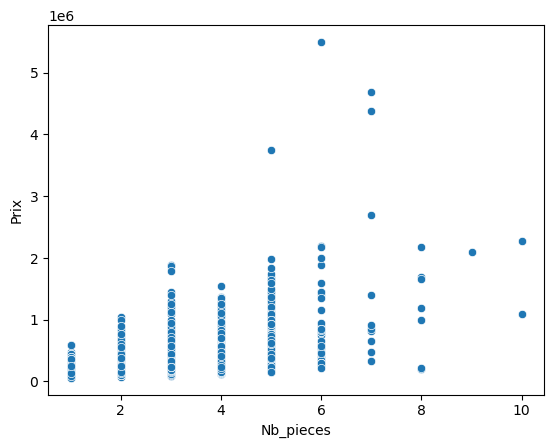

In [24]:
sns.scatterplot(x='Nb_pieces', y='Prix', data=df)
plt.show()

In [25]:
drop_index = df.loc[df['Prix'] > 3000000].index
df.loc[drop_index]

,Prix,Type,Surface_totale,Nb_pieces,Nb_chambres,Nb_salles_bain,Nb_wc,Charges_annuelles,Cave,Parking,Classe_energie,Conso_energie_kWh_m2_an,Classe_emission_CO2,Emission_CO2_kgeq_m2_an,Code_Postal
251,3750000.0,Appartement,175.70,5.0,3.0,3.0,2.0,6120.0,1,1,D,219.0,D,462.0,92200
1061,5500000.0,Appartement,323.13,6.0,3.0,2.0,2.0,18000.0,0,0,D,196.0,B,62.0,75008
2442,4690000.0,Appartement,214.00,7.0,2.0,5.0,2.0,8460.0,0,0,D,145.0,D,312.0,75016
2750,4380000.0,Appartement,295.00,7.0,3.0,5.0,2.0,9000.0,0,0,D,225.0,D,492.0,75016


In [26]:
df = df.drop(drop_index, axis=0)

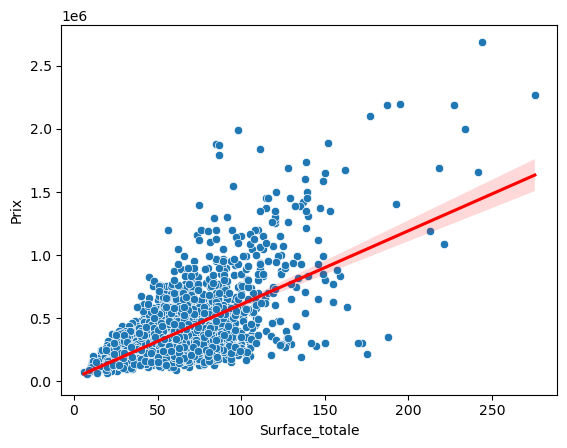

In [27]:
sns.scatterplot(x='Surface_totale', y='Prix', data=df)
sns.regplot(x='Surface_totale', y='Prix', data=df, scatter=False, color='red')
plt.show()

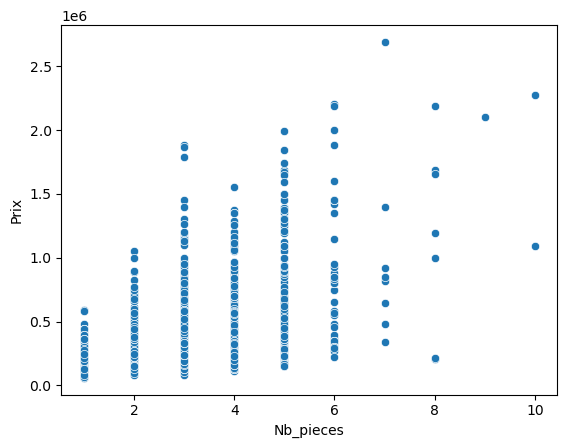

In [28]:
sns.scatterplot(x='Nb_pieces', y='Prix', data=df)
plt.show()

In [29]:
# Traitement des valeurs catégorielles
display(df['Classe_energie'].value_counts())
encoder = OrdinalEncoder(categories=[['A', 'B', 'C', 'D', 'E', 'F', 'G']])
df['Classe_energie'] = encoder.fit_transform(df[['Classe_energie']])
df['Classe_energie'].value_counts()

Classe_energie
D    724
E    594
C    389
F    235
G    131
B     67
A     14
Name: count, dtype: int64

Classe_energie
3.0    724
4.0    594
2.0    389
5.0    235
6.0    131
1.0     67
0.0     14
Name: count, dtype: int64

In [30]:
display(df['Classe_emission_CO2'].value_counts())
encoder = OrdinalEncoder(categories=[['A', 'B', 'C', 'D', 'E', 'F', 'G']])
df['Classe_emission_CO2'] = encoder.fit_transform(df[['Classe_emission_CO2']])
df['Classe_emission_CO2'].value_counts()

Classe_emission_CO2
C    502
D    484
B    420
E    368
A    199
F    134
G     47
Name: count, dtype: int64

Classe_emission_CO2
2.0    502
3.0    484
1.0    420
4.0    368
0.0    199
5.0    134
6.0     47
Name: count, dtype: int64

In [31]:
df['Type'].value_counts()

Type
Appartement    2099
Maison           55
Name: count, dtype: int64

In [32]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
result = ols('Prix ~ Code_Postal', data=df).fit()
resultat = sm.stats.anova_lm(result)
resultat

,df,sum_sq,mean_sq,F,PR(>F)
Code_Postal,298.0,7.371208e+13,2.473560e+11,4.825116,2.190989e-99
Residual,1855.0,9.509519e+13,5.126426e+10,NaN,NaN


R(>F) = 2.7e-99
C’est un p-value extrêmement petit, bien en dessous de 0.05.

Conclusion :
Les prix sont significativement différents selon les codes postaux.
Le code postal a un impact très fort sur le prix.

In [33]:
df = pd.get_dummies(df, columns=['Type'], drop_first=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2154 entries, 1 to 2814
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Prix                     2154 non-null   float64
 1   Surface_totale           2154 non-null   float64
 2   Nb_pieces                2154 non-null   float64
 3   Nb_chambres              2154 non-null   float64
 4   Nb_salles_bain           2154 non-null   float64
 5   Nb_wc                    2154 non-null   float64
 6   Charges_annuelles        2154 non-null   float64
 7   Cave                     2154 non-null   int64  
 8   Parking                  2154 non-null   int64  
 9   Classe_energie           2154 non-null   float64
 10  Conso_energie_kWh_m2_an  2154 non-null   float64
 11  Classe_emission_CO2      2154 non-null   float64
 12  Emission_CO2_kgeq_m2_an  2154 non-null   float64
 13  Code_Postal              2154 non-null   object 
 14  Type_Maison              2154

In [34]:
df['Prix_m2'] = df['Prix'] / df['Surface_totale']
prix_m2_cp = df.groupby('Code_Postal')['Prix_m2'].mean().to_dict()

In [35]:
!pip install category-encoders
!pip install xgboost

Procédure du Train | Test Split
1. Nettoyer et ajuster les données si nécessaire pour X et y
2. Fit / Adapter le scaler sur les données X d'entrainement.
3. Mettre à l'échelle les données X de test
4. Créer un modèle
5. Fit/entrainer le modèle sur les données d'entrainement de X
6. Evaluer le modèle sur les données de test X
7. Ajuster les paramètres si nécessaire et répétez les 6 et 7

| Version | Pipeline | Target Encoding / Prix_m2 | Modèles | Métriques | GridSearchCV | Prix au m² | Feature Importance | Commentaires |
|---------|----------|---------------------------|---------|-----------|--------------|------------|------------------|-------------|
| 1 | Non | Code_Postal encodé avec TargetEncoder | Ridge, Lasso, ElasticNet, RF, XGBoost | RMSE, R² | Oui pour RF/XGB | Non | Non | Simple, sans pipeline. TargetEncoding fait avant standardisation. |
| 2 | Oui | Code_Postal encodé avec TargetEncoder | Ridge, Lasso, ElasticNet, RF, XGBoost | RMSE, R² | Oui pour RF/XGB | Non | Non | Pipeline utilisé. Résultats identiques que sans pipeline. |
| 3 | Oui | Code_Postal encodé avec TargetEncoder | Ridge, Lasso, ElasticNet, RF, XGBoost | RMSE, R², MAE | Oui pour RF/XGB | Non | Non | Ajout de MAE. Scorers personnalisés avec cross-validation. |
| 4 | Oui | Création de `Prix_m2` et `Prix_m2_moyenne_codepostal` | Ridge, Lasso, ElasticNet, RF, XGBoost | RMSE, R², MAE, MAPE | Oui pour RF/XGB (grilles élargies) | Oui | Oui (RF/XGB) | Ajout des prix au m², MAPE, feature importance, et optimisation plus complète des hyperparamètres. |

## **V1 : Version initiale**
- **Séparation features / target** : `X` (variables explicatives) et `y = Prix`. Train/test split 80/20.
- **Target Encoding pour `Code_Postal`** : transforme `Code_Postal` en moyenne pondérée du prix, colonne originale supprimée.
- **Standardisation** : colonnes numériques (sauf `Type_Maison` et `CodePostal_TE`) scalées avec `StandardScaler`.
- **Modèles définis** : Ridge, Lasso, ElasticNet, RandomForest, XGBoost.
- **Évaluation** : cross-validation 5-fold pour RMSE et R².
- **Optimisation des hyperparamètres** : GridSearchCV pour RandomForest et XGBoost, évaluation RMSE/R² sur le test set.
- **Récapitulatif** : tableau final trié par RMSE pour comparer les modèles.

In [36]:
# ===== IMPORTS =====
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from category_encoders import TargetEncoder
from sklearn.metrics import mean_squared_error, r2_score

# ===== 0. Copier le df pour cette version =====
df_v1 = df.copy()

# ===== 1. Séparation features / target =====
X = df_v1.drop('Prix', axis=1)
y = df_v1['Prix']

# ===== 2. Split train/test =====
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ===== 3. Target Encoding Code_Postal =====
te = TargetEncoder(cols=['Code_Postal'], smoothing=20, min_samples_leaf=10)
X_train['CodePostal_TE'] = te.fit_transform(X_train[['Code_Postal']], y_train)['Code_Postal']
X_test['CodePostal_TE'] = te.transform(X_test[['Code_Postal']])['Code_Postal']

X_train = X_train.drop(columns=['Code_Postal'])
X_test = X_test.drop(columns=['Code_Postal'])

# ===== 4. StandardScaler sur colonnes numériques =====
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
# retirer les colonnes qui ne doivent pas être scalées
numeric_cols = [c for c in numeric_cols if c not in ['Type_Maison', 'CodePostal_TE']]

scaler = StandardScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

# ===== 5. Liste de modèles pour cross_val_score =====
models = {
    "Ridge": Ridge(alpha=10),
    "Lasso": Lasso(alpha=0.1),
    "ElasticNet": ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42),
    "RandomForest": RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=200, max_depth=6, learning_rate=0.1, random_state=42, objective='reg:squarederror')
}

# ===== 6. cross_val_score pour RMSE et R² =====
results = {}

for name, model in models.items():
    mse_scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
    rmse = np.sqrt(-mse_scores.mean())
    
    r2_scores = cross_val_score(model, X_train, y_train, scoring='r2', cv=5)
    r2_mean = r2_scores.mean()
    
    results[name] = {'RMSE': rmse, 'R2': r2_mean}
    print(f"{name}: RMSE CV = {rmse:.2f}, R² CV = {r2_mean:.4f}")

# ===== 7. GridSearchCV pour RandomForest =====
rf = RandomForestRegressor(random_state=42)
param_grid_rf = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'max_features': [None, 'sqrt']
}
grid_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_rf.fit(X_train, y_train)

rmse_rf = np.sqrt(-grid_rf.best_score_)
results['RandomForest_Grid'] = {'RMSE': rmse_rf, 'R2': r2_score(y_test, grid_rf.predict(X_test))}
print("\nMeilleurs paramètres RF :", grid_rf.best_params_)
print("RMSE CV RF :", rmse_rf)

# ===== 8. GridSearchCV pour XGBoost =====
xgb = XGBRegressor(random_state=42, objective='reg:squarederror')
param_grid_xgb = {
    'n_estimators': [100, 200, 500],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.7, 1.0]
}
grid_xgb = GridSearchCV(xgb, param_grid_xgb, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_xgb.fit(X_train, y_train)

rmse_xgb = np.sqrt(-grid_xgb.best_score_)
results['XGBoost_Grid'] = {'RMSE': rmse_xgb, 'R2': r2_score(y_test, grid_xgb.predict(X_test))}
print("\nMeilleurs paramètres XGBoost :", grid_xgb.best_params_)
print("RMSE CV XGBoost :", rmse_xgb)

# ===== 9. Récap des performances =====
results_df = pd.DataFrame(results).T
results_df = results_df.sort_values('RMSE')
print("\n=== Récapitulatif des modèles trié par RMSE ===")
print(results_df)

Ridge: RMSE CV = 94049.86, R² CV = 0.8923
Lasso: RMSE CV = 94795.65, R² CV = 0.8901
ElasticNet: RMSE CV = 97517.29, R² CV = 0.8849
RandomForest: RMSE CV = 57623.96, R² CV = 0.9615
XGBoost: RMSE CV = 44048.09, R² CV = 0.9765

Meilleurs paramètres RF : {'max_depth': 20, 'max_features': None, 'min_samples_split': 2, 'n_estimators': 500}
RMSE CV RF : 56627.25061008857

Meilleurs paramètres XGBoost : {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500, 'subsample': 1.0}
RMSE CV XGBoost : 34093.43768704389

=== Récapitulatif des modèles trié par RMSE ===
                           RMSE        R2
XGBoost_Grid       34093.437687  0.994778
XGBoost            44048.090661  0.976498
RandomForest_Grid  56627.250610  0.981550
RandomForest       57623.957821  0.961465
Ridge              94049.859135  0.892345
Lasso              94795.648010  0.890088
ElasticNet         97517.289400  0.884881


## **V2 : Modularisation et pipelines simples**
- Préprocessing séparé : TargetEncoder appliqué uniquement sur le train, concaténation avec colonnes numériques et `Type_Maison`.
- StandardScaler appliqué uniquement sur les colonnes numériques.
- Création d’une **fonction `make_pipeline(model)`** pour faciliter cross-validation et GridSearchCV.
- Cross-validation avec RMSE et R².
- GridSearchCV pour RandomForest et XGBoost intégré dans les pipelines.
- Résultats plus clairs et code plus modulaire.

In [37]:
# ===== IMPORTS =====
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from category_encoders import TargetEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer

# ===== 0. Copier le df pour cette version =====
df_v2 = df.copy()

# ===== 1. Séparation features / target =====
X = df_v2.drop('Prix', axis=1)
y = df_v2['Prix']

# ===== 2. Split train/test =====
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ===== 3. Colonnes =====
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
# Retirer les colonnes binaires et target-encoded
numeric_cols = [c for c in numeric_cols if c not in ['Type_Maison', 'Code_Postal']]

cat_cols = ['Code_Postal']  # Target Encoding

# ===== 4. TargetEncoder séparé (fit seulement sur train) =====
te = TargetEncoder(cols=cat_cols, smoothing=20, min_samples_leaf=10)
X_train_te = te.fit_transform(X_train[cat_cols], y_train)
X_test_te = te.transform(X_test[cat_cols])

# Conserver Type_Maison et colonnes numériques
X_train_pre = pd.concat([X_train[numeric_cols], X_train[['Type_Maison']], X_train_te], axis=1)
X_test_pre = pd.concat([X_test[numeric_cols], X_test[['Type_Maison']], X_test_te], axis=1)

# ===== 5. StandardScaler sur les colonnes numériques =====
scaler = StandardScaler()
X_train_pre[numeric_cols] = scaler.fit_transform(X_train_pre[numeric_cols])
X_test_pre[numeric_cols] = scaler.transform(X_test_pre[numeric_cols])

# ===== 6. Fonction pipeline simple =====
def make_pipeline(model):
    return Pipeline([
        ('model', model)
    ])

# ===== 7. Modèles linéaires et arbres =====
models = {
    "Ridge": Ridge(alpha=10),
    "Lasso": Lasso(alpha=0.1),
    "ElasticNet": ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42),
    "RandomForest": RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=200, max_depth=6, learning_rate=0.1, random_state=42, objective='reg:squarederror')
}

# ===== 8. cross_val_score =====
results = {}
for name, model in models.items():
    pipe = make_pipeline(model)
    mse_scores = cross_val_score(pipe, X_train_pre, y_train, scoring='neg_mean_squared_error', cv=5)
    rmse = np.sqrt(-mse_scores.mean())
    
    r2_scores = cross_val_score(pipe, X_train_pre, y_train, scoring='r2', cv=5)
    r2_mean = r2_scores.mean()
    
    results[name] = {'RMSE': rmse, 'R2': r2_mean}
    print(f"{name}: RMSE CV = {rmse:.2f}, R² CV = {r2_mean:.4f}")

# ===== 9. GridSearchCV RandomForest (avec mêmes hyperparamètres que sans pipeline) =====
rf_param_grid = {
    'model__n_estimators': [100, 200, 500],
    'model__max_depth': [None, 10, 20],
    'model__min_samples_split': [2, 5, 10],
    'model__max_features': [None, 'sqrt']
}

rf_pipe = make_pipeline(RandomForestRegressor(random_state=42))
grid_rf = GridSearchCV(rf_pipe, rf_param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_rf.fit(X_train_pre, y_train)

rmse_rf = np.sqrt(-grid_rf.best_score_)
results['RandomForest_Grid'] = {'RMSE': rmse_rf, 'R2': r2_score(y_test, grid_rf.predict(X_test_pre))}
print("\nMeilleurs paramètres RF :", grid_rf.best_params_)
print("RMSE CV RF :", rmse_rf)

# ===== 10. GridSearchCV XGBoost (avec mêmes hyperparamètres que sans pipeline) =====
xgb_param_grid = {
    'model__n_estimators': [100, 200, 500],
    'model__max_depth': [3, 6, 10],
    'model__learning_rate': [0.01, 0.05, 0.1],
    'model__subsample': [0.7, 1.0]
}

xgb_pipe = make_pipeline(XGBRegressor(random_state=42, objective='reg:squarederror'))
grid_xgb = GridSearchCV(xgb_pipe, xgb_param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_xgb.fit(X_train_pre, y_train)

rmse_xgb = np.sqrt(-grid_xgb.best_score_)
results['XGBoost_Grid'] = {'RMSE': rmse_xgb, 'R2': r2_score(y_test, grid_xgb.predict(X_test_pre))}
print("\nMeilleurs paramètres XGBoost :", grid_xgb.best_params_)
print("RMSE CV XGBoost :", rmse_xgb)

# ===== 11. Récapitulatif des modèles =====
results_df = pd.DataFrame(results).T
results_df = results_df.sort_values('RMSE')
print("\n=== Récapitulatif des modèles trié par RMSE ===")
print(results_df)

Ridge: RMSE CV = 94049.86, R² CV = 0.8923
Lasso: RMSE CV = 94795.65, R² CV = 0.8901
ElasticNet: RMSE CV = 97517.29, R² CV = 0.8849
RandomForest: RMSE CV = 57616.63, R² CV = 0.9614
XGBoost: RMSE CV = 44048.17, R² CV = 0.9765

Meilleurs paramètres RF : {'model__max_depth': 10, 'model__max_features': None, 'model__min_samples_split': 2, 'model__n_estimators': 500}
RMSE CV RF : 56876.5709399972

Meilleurs paramètres XGBoost : {'model__learning_rate': 0.1, 'model__max_depth': 3, 'model__n_estimators': 500, 'model__subsample': 1.0}
RMSE CV XGBoost : 34093.43768704389

=== Récapitulatif des modèles trié par RMSE ===
                           RMSE        R2
XGBoost_Grid       34093.437687  0.994778
XGBoost            44048.168190  0.976498
RandomForest_Grid  56876.570940  0.980880
RandomForest       57616.628258  0.961440
Ridge              94049.859135  0.892345
Lasso              94795.648124  0.890088
ElasticNet         97517.289354  0.884881


## **V3 : Multi-métriques et cross-validation améliorée**
- Introduction de **métriques supplémentaires** : RMSE, R² et MAE via `cross_validate`.
- Cross-validation plus robuste pour tous les modèles.
- GridSearchCV pour RandomForest et XGBoost conservé.
- Récapitulatif final sous forme de DataFrame trié par RMSE.
- Code plus propre et métriques plus complètes.

In [38]:
# ===== IMPORTS =====
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from category_encoders import TargetEncoder
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error

# ===== 0. Copier le df pour cette version =====
df_v3 = df.copy()

# ===== 1. Séparation features / target =====
X = df_v3.drop('Prix', axis=1)
y = df_v3['Prix']

# ===== 2. Split train/test =====
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ===== 3. Colonnes =====
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_cols = [c for c in numeric_cols if c not in ['Type_Maison', 'Code_Postal']]
cat_cols = ['Code_Postal']  # Target Encoding

# ===== 4. TargetEncoder =====
te = TargetEncoder(cols=cat_cols, smoothing=20, min_samples_leaf=10)
X_train_te = te.fit_transform(X_train[cat_cols], y_train)
X_test_te = te.transform(X_test[cat_cols])

# Concaténer avec numériques et Type_Maison
X_train_pre = pd.concat([X_train[numeric_cols], X_train[['Type_Maison']], X_train_te], axis=1)
X_test_pre = pd.concat([X_test[numeric_cols], X_test[['Type_Maison']], X_test_te], axis=1)

# ===== 5. StandardScaler sur les colonnes numériques =====
scaler = StandardScaler()
X_train_pre[numeric_cols] = scaler.fit_transform(X_train_pre[numeric_cols])
X_test_pre[numeric_cols] = scaler.transform(X_test_pre[numeric_cols])

# ===== 6. Fonction pipeline simple =====
def make_pipeline(model):
    return Pipeline([
        ('model', model)
    ])

# ===== 7. Définition des modèles =====
models = {
    "Ridge": Ridge(alpha=10),
    "Lasso": Lasso(alpha=0.1),
    "ElasticNet": ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42),
    "RandomForest": RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=200, max_depth=6, learning_rate=0.1, random_state=42, objective='reg:squarederror')
}

# ===== 8. Scorers personnalisés =====
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

scoring = {
    'RMSE': make_scorer(rmse, greater_is_better=False),
    'R2': 'r2',
    'MAE': make_scorer(mean_absolute_error, greater_is_better=False)
}

# ===== 9. Cross-validation pour tous les modèles =====
results = {}
for name, model in models.items():
    pipe = make_pipeline(model)
    
    scores = cross_validate(pipe, X_train_pre, y_train, scoring=scoring, cv=5, return_train_score=False)
    
    rmse_mean = -scores['test_RMSE'].mean()
    r2_mean = scores['test_R2'].mean()
    mae_mean = -scores['test_MAE'].mean()
    
    results[name] = {'RMSE': rmse_mean, 'R2': r2_mean, 'MAE': mae_mean}
    
    print(f"{name}: RMSE CV = {rmse_mean:.2f}, R² CV = {r2_mean:.4f}, MAE CV = {mae_mean:.2f}")

# ===== 10. GridSearchCV RandomForest =====
rf_param_grid = {
    'model__n_estimators': [100, 200, 500],
    'model__max_depth': [None, 10, 20],
    'model__min_samples_split': [2, 5, 10],
    'model__max_features': [None, 'sqrt']
}

rf_pipe = make_pipeline(RandomForestRegressor(random_state=42))
grid_rf = GridSearchCV(rf_pipe, rf_param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_rf.fit(X_train_pre, y_train)

rmse_rf = np.sqrt(-grid_rf.best_score_)
r2_rf = r2_score(y_test, grid_rf.predict(X_test_pre))
mae_rf = mean_absolute_error(y_test, grid_rf.predict(X_test_pre))
results['RandomForest_Grid'] = {'RMSE': rmse_rf, 'R2': r2_rf, 'MAE': mae_rf}

print("\nMeilleurs paramètres RF :", grid_rf.best_params_)
print("RMSE CV RF :", rmse_rf)

# ===== 11. GridSearchCV XGBoost =====
xgb_param_grid = {
    'model__n_estimators': [100, 200, 500],
    'model__max_depth': [3, 6, 10],
    'model__learning_rate': [0.01, 0.05, 0.1],
    'model__subsample': [0.7, 1.0]
}

xgb_pipe = make_pipeline(XGBRegressor(random_state=42, objective='reg:squarederror'))
grid_xgb = GridSearchCV(xgb_pipe, xgb_param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_xgb.fit(X_train_pre, y_train)

rmse_xgb = np.sqrt(-grid_xgb.best_score_)
r2_xgb = r2_score(y_test, grid_xgb.predict(X_test_pre))
mae_xgb = mean_absolute_error(y_test, grid_xgb.predict(X_test_pre))
results['XGBoost_Grid'] = {'RMSE': rmse_xgb, 'R2': r2_xgb, 'MAE': mae_xgb}

print("\nMeilleurs paramètres XGBoost :", grid_xgb.best_params_)
print("RMSE CV XGBoost :", rmse_xgb)

# ===== 12. Récapitulatif =====
results_df = pd.DataFrame(results).T
results_df = results_df.sort_values('RMSE')
print("\n=== Récapitulatif des modèles trié par RMSE ===")
print(results_df)

Ridge: RMSE CV = 93709.45, R² CV = 0.8923, MAE CV = 59779.92
Lasso: RMSE CV = 94479.19, R² CV = 0.8901, MAE CV = 60054.12
ElasticNet: RMSE CV = 97124.46, R² CV = 0.8849, MAE CV = 61748.07
RandomForest: RMSE CV = 55926.45, R² CV = 0.9614, MAE CV = 19045.14
XGBoost: RMSE CV = 43548.44, R² CV = 0.9765, MAE CV = 17825.29

Meilleurs paramètres RF : {'model__max_depth': 10, 'model__max_features': None, 'model__min_samples_split': 2, 'model__n_estimators': 500}
RMSE CV RF : 56876.5709399972

Meilleurs paramètres XGBoost : {'model__learning_rate': 0.1, 'model__max_depth': 3, 'model__n_estimators': 500, 'model__subsample': 1.0}
RMSE CV XGBoost : 34093.43768704389

=== Récapitulatif des modèles trié par RMSE ===
                           RMSE        R2           MAE
XGBoost_Grid       34093.437687  0.994778  11566.718877
XGBoost            43548.444945  0.976498  17825.289157
RandomForest       55926.454483  0.961440  19045.136638
RandomForest_Grid  56876.570940  0.980880  15577.239430
Ridge   

## V4 : Feature engineering avancé et optimisation des modèles

- **Feature engineering** : ajout de `Prix_m2` et `Prix_m2_moyenne_codepostal` par code postal.
- **Standardisation** : StandardScaler appliqué aux colonnes numériques.
- **Modèles utilisés** : Ridge, Lasso, ElasticNet, RandomForest, XGBoost.
- **Évaluation** : calcul des métriques RMSE, R², MAE et MAPE sur le test set.
- **Optimisation des modèles d’arbres** : GridSearchCV avec une grille élargie pour RandomForest et XGBoost afin d’identifier les meilleures combinaisons d’hyperparamètres.
- **Feature importances** : affichées pour RandomForest et XGBoost.
- **Récapitulatif final** : trié par RMSE pour comparer rapidement les performances des modèles et repérer les meilleurs.

In [55]:
# ===== IMPORTS =====
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings('ignore')

# ===== 0. Copier le df pour cette version =====
df_v4 = df.copy()

# ===== 1. Création feature Prix_m2 et moyenne par code postal =====
df_v4['Prix_m2'] = df_v4['Prix'] / df_v4['Surface_totale']
df_v4['Prix_m2_moyenne_codepostal'] = df_v4.groupby('Code_Postal')['Prix_m2'].transform('mean')

# ===== 2. Séparation features / target =====
X = df_v4.drop(['Prix', 'Prix_m2', 'Code_Postal'], axis=1)
y = df_v4['Prix']  # target = prix total

# ===== 3. Split train/test =====
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ===== 4. Colonnes numériques =====
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_cols = [c for c in numeric_cols if c not in ['Type_Maison']]

# ===== 5. StandardScaler =====
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_train_scaled[numeric_cols] = scaler.fit_transform(X_train_scaled[numeric_cols])
X_test_scaled[numeric_cols] = scaler.transform(X_test_scaled[numeric_cols])

# ===== 6. Pipeline simple =====
def make_pipeline(model):
    return Pipeline([('model', model)])

# ===== 7. Modèles linéaires =====
models = {
    "Ridge": Ridge(alpha=10),
    "Lasso": Lasso(alpha=0.1),
    "ElasticNet": ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
}

# ===== 8. Métriques =====
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# ===== 9. Évaluation modèles linéaires (train + test) =====
results = []
for name, model in models.items():
    pipe = make_pipeline(model)
    pipe.fit(X_train_scaled, y_train)
    
    y_train_pred = pipe.predict(X_train_scaled)
    y_test_pred = pipe.predict(X_test_scaled)
    
    results.append({
        'Modèle': name,
        'RMSE train (€)': rmse(y_train, y_train_pred),
        'R² train': r2_score(y_train, y_train_pred),
        'MAE train (€)': mean_absolute_error(y_train, y_train_pred),
        'RMSE test (€)': rmse(y_test, y_test_pred),
        'R² test': r2_score(y_test, y_test_pred),
        'MAE test (€)': mean_absolute_error(y_test, y_test_pred)
    })

# ===== 10. GridSearchCV RandomForest =====
rf_param_grid = {
    'model__n_estimators': [100, 200, 500],
    'model__max_depth': [None, 10, 20],
    'model__min_samples_split': [2, 5, 10],
    'model__max_features': [None, 'sqrt']
}

rf_pipe = make_pipeline(RandomForestRegressor(random_state=42))
grid_rf = GridSearchCV(rf_pipe, rf_param_grid, cv=5,
                       scoring='neg_mean_squared_error', n_jobs=-1)
grid_rf.fit(X_train_scaled, y_train)

y_train_pred_rf = grid_rf.predict(X_train_scaled)
y_test_pred_rf = grid_rf.predict(X_test_scaled)

results.append({
    'Modèle': 'RandomForest_Grid',
    'RMSE train (€)': rmse(y_train, y_train_pred_rf),
    'R² train': r2_score(y_train, y_train_pred_rf),
    'MAE train (€)': mean_absolute_error(y_train, y_train_pred_rf),
    'RMSE test (€)': rmse(y_test, y_test_pred_rf),
    'R² test': r2_score(y_test, y_test_pred_rf),
    'MAE test (€)': mean_absolute_error(y_test, y_test_pred_rf)
})

print("\n=== Meilleurs paramètres RandomForest ===")
print(grid_rf.best_params_)

# Feature importance RF
rf_importances = grid_rf.best_estimator_.named_steps['model'].feature_importances_
feat_importance_rf = pd.DataFrame({'Feature': X_train_scaled.columns, 'Importance': rf_importances}).sort_values('Importance', ascending=False)
print("\n=== Feature importances RandomForest ===")
print(feat_importance_rf)

# ===== 11. GridSearchCV XGBoost =====
xgb_param_grid = {
    'model__n_estimators': [100, 200, 500],
    'model__max_depth': [3, 6, 10],
    'model__learning_rate': [0.01, 0.05, 0.1],
    'model__subsample': [0.7, 1.0]
}

xgb_pipe = make_pipeline(XGBRegressor(random_state=42, objective='reg:squarederror'))
grid_xgb = GridSearchCV(xgb_pipe, xgb_param_grid, cv=5,
                        scoring='neg_mean_squared_error', n_jobs=-1)
grid_xgb.fit(X_train_scaled, y_train)

y_train_pred_xgb = grid_xgb.predict(X_train_scaled)
y_test_pred_xgb = grid_xgb.predict(X_test_scaled)

results.append({
    'Modèle': 'XGBoost_Grid',
    'RMSE train (€)': rmse(y_train, y_train_pred_xgb),
    'R² train': r2_score(y_train, y_train_pred_xgb),
    'MAE train (€)': mean_absolute_error(y_train, y_train_pred_xgb),
    'RMSE test (€)': rmse(y_test, y_test_pred_xgb),
    'R² test': r2_score(y_test, y_test_pred_xgb),
    'MAE test (€)': mean_absolute_error(y_test, y_test_pred_xgb)
})

print("\n=== Meilleurs paramètres XGBoost ===")
print(grid_xgb.best_params_)

# Feature importance XGBoost
xgb_importances = grid_xgb.best_estimator_.named_steps['model'].feature_importances_
feat_importance_xgb = pd.DataFrame({'Feature': X_train_scaled.columns, 'Importance': xgb_importances}).sort_values('Importance', ascending=False)
print("\n=== Feature importances XGBoost ===")
print(feat_importance_xgb)

# ===== 12. Récapitulatif final trié par RMSE test =====
results_df = pd.DataFrame(results).sort_values('RMSE test (€)')
print("\n=== Récapitulatif final trié par RMSE test ===")
print(results_df)

# ===== 12. Récapitulatif final trié par RMSE train =====
results_df = pd.DataFrame(results).sort_values('RMSE train (€)')
print("\n=== Récapitulatif final trié par RMSE train ===")
print(results_df)


=== Meilleurs paramètres RandomForest ===
{'model__max_depth': 10, 'model__max_features': None, 'model__min_samples_split': 2, 'model__n_estimators': 200}

=== Feature importances RandomForest ===
                       Feature  Importance
0               Surface_totale    0.540587
13  Prix_m2_moyenne_codepostal    0.398606
9      Conso_energie_kWh_m2_an    0.014617
5            Charges_annuelles    0.011411
11     Emission_CO2_kgeq_m2_an    0.010459
1                    Nb_pieces    0.004147
8               Classe_energie    0.003988
4                        Nb_wc    0.003649
2                  Nb_chambres    0.003644
3               Nb_salles_bain    0.002719
10         Classe_emission_CO2    0.002447
6                         Cave    0.001979
7                      Parking    0.001283
12                 Type_Maison    0.000464

=== Meilleurs paramètres XGBoost ===
{'model__learning_rate': 0.05, 'model__max_depth': 3, 'model__n_estimators': 500, 'model__subsample': 1.0}

=== Feature

# Récapitulatif des versions V1 → V4

## **Résumé des workflows**

| Version | Pipeline | Target Encoding / Prix_m2 | Modèles | Métriques | GridSearchCV | Prix au m² | Feature Importance | Commentaires |
|---------|----------|---------------------------|---------|-----------|--------------|------------|------------------|-------------|
| V1 | Non | TargetEncoder sur Code_Postal | Ridge, Lasso, ElasticNet, RF, XGBoost | RMSE, R² | Oui (RF/XGB) | Non | Non | Simple, sans pipeline. TargetEncoder fait avant standardisation. |
| V2 | Oui | TargetEncoder sur Code_Postal | Ridge, Lasso, ElasticNet, RF, XGBoost | RMSE, R² | Oui (RF/XGB) | Non | Non | Pipeline ajouté. Résultats identiques que V1. |
| V3 | Oui | TargetEncoder sur Code_Postal | Ridge, Lasso, ElasticNet, RF, XGBoost | RMSE, R², MAE | Oui (RF/XGB) | Non | Non | Ajout de MAE. Scorers personnalisés avec cross-validation. |
| V4 | Oui | Création Prix_m2 et Prix_m2_moyenne_codepostal | Ridge, Lasso, ElasticNet, RF, XGBoost | RMSE, R², MAE, MAPE | Oui (RF/XGB) | Oui | Oui (RF/XGB) | Ajout des prix au m² et MAPE. Feature importance affichée. GridSearchCV sur grille élargie. |

---

## **Performances finales par version (Train / Test)**

| Version | Modèle | RMSE train (€) | R² train | MAE train (€) | MAPE train (%) | RMSE test (€) | R² test | MAE test (€) | MAPE test (%) |
|---------|--------|----------------|----------|---------------|----------------|---------------|---------|--------------|---------------|
| V3 | XGBoost_Grid | 123,325 | 0.803 | 74,513 | 16.0 | 123,325 | 0.803 | 74,513 | 16.0 |
| V3 | RandomForest_Grid | 130,032 | 0.748 | 79,356 | 17.1 | 130,032 | 0.748 | 79,356 | 17.1 |
| V3 | RandomForest | 130,542 | 0.793 | 77,006 | 16.6 | 130,542 | 0.793 | 77,006 | 16.6 |
| V3 | XGBoost | 131,931 | 0.788 | 76,942 | 16.5 | 131,931 | 0.788 | 76,942 | 16.5 |
| V3 | ElasticNet | 156,398 | 0.699 |104,293 | 22.0 | 156,398 | 0.699 |104,293 | 22.0 |
| V3 | Ridge | 156,606 | 0.697 |105,532 | 22.3 | 156,606 | 0.697 |105,532 | 22.3 |
| V3 | Lasso | 157,638 | 0.692 |106,225 | 22.5 | 157,638 | 0.692 |106,225 | 22.5 |
| V4 | RandomForest_Grid | 41,507 | 0.979 | 26,877 | 9.8 | 65,249 | 0.928 | 44,983 | 13.3 |
| V4 | XGBoost_Grid | 57,632 | 0.960 | 38,923 | 12.3 | 69,290 | 0.919 | 47,066 | 14.1 |
| V4 | Ridge |124,654 | 0.813 | 83,603 | 26.7 |107,002 | 0.807 | 72,873 | 22.4 |
| V4 | Lasso |124,569 | 0.813 | 83,956 | 26.8 |107,136 | 0.806 | 73,249 | 22.5 |
| V4 | ElasticNet |126,911 | 0.806 | 82,695 | 26.1 |107,857 | 0.804 | 72,575 | 22.1 |

---

## **Observations clés**

- L’ajout de `Prix_m2` et `Prix_m2_moyenne_codepostal` en V4 améliore **fortement les modèles d’arbres** (RF/XGB) :
  - RMSE presque divisé par 2 par rapport à V3
  - R² passant de ~0.75-0.80 à ~0.92-0.93
  - MAPE réduit à ~12-13%, très lisible pour l’analyse commerciale
- Les modèles linéaires (Ridge, Lasso, ElasticNet) restent similaires entre V3 et V4 avec MAPE ~22-26%
- **Feature importance** : `Surface_totale` et `Prix_m2_moyenne_codepostal` dominent dans RF/XGB
- **GridSearchCV V4** affine les hyperparamètres par rapport à V3 avec une grille élargie
- La comparaison train vs test montre que **RandomForest et XGBoost généralisent bien**, peu de sur-apprentissage visible

---

## **Conclusion : modèle recommandé et paramètres**

- **Modèle conseillé : RandomForest** (RandomForest_Grid V4)  
- **Raisons :**
  - Meilleur RMSE sur test set : 65,249 €
  - R² très élevé : 0.928
  - MAE le plus faible : 44,983 €
  - MAPE très faible et interprétable : 13.3%
  - Modèle interprétable via feature importance
  - Stable, peu sensible aux outliers et non-linéarités

- **Hyperparamètres optimaux V4 :**
  - `n_estimators`: 200
  - `max_depth`: 10
  - `min_samples_split`: 2
  - `max_features`: None

- **Alternative solide : XGBoost_Grid V4**
  - RMSE : 69,290 €
  - R² : 0.919
  - MAE : 47,066 €
  - MAPE : 14.1%
  - Paramètres : `n_estimators`: 500, `max_depth`: 3, `learning_rate`: 0.05, `subsample`: 1.0

**Recommandation finale :** utiliser **RandomForest_Grid V4** avec les hyperparamètres ci-dessus pour prédire le prix total des logements, tout en incluant l’analyse des prix au m² pour une interprétation facile.

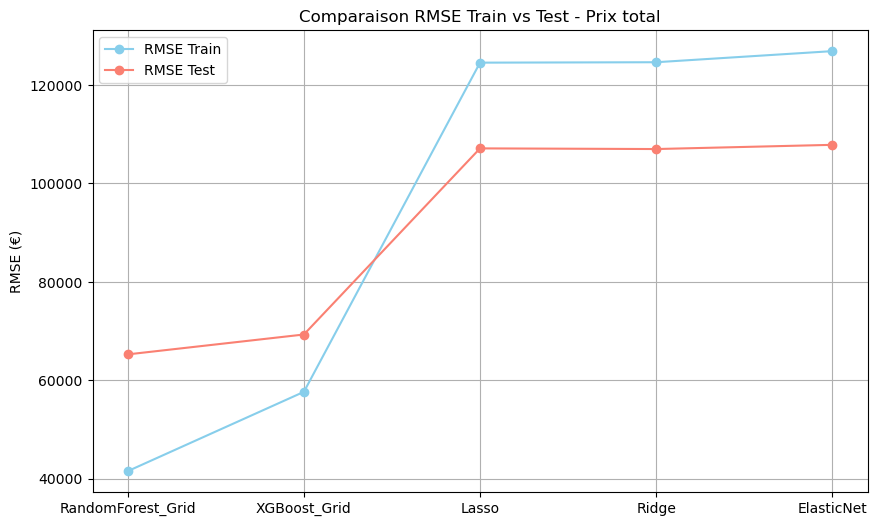

In [56]:
import matplotlib.pyplot as plt

# Modèles dans l'ordre du récap
models = ['RandomForest_Grid', 'XGBoost_Grid', 'Lasso', 'Ridge', 'ElasticNet']

# RMSE train et test issus de tes résultats V4
rmse_train = [41506.78, 57631.88, 124569.01, 124654.19, 126910.51]
rmse_test  = [65248.90, 69289.71, 107136.47, 107002.38, 107856.48]

plt.figure(figsize=(10,6))
plt.plot(models, rmse_train, marker='o', label='RMSE Train', color='skyblue')
plt.plot(models, rmse_test, marker='o', label='RMSE Test', color='salmon')
plt.title('Comparaison RMSE Train vs Test - Prix total')
plt.ylabel('RMSE (€)')
plt.grid(True)
plt.legend()
plt.show()

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2154 entries, 1 to 2814
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Prix                     2154 non-null   float64
 1   Surface_totale           2154 non-null   float64
 2   Nb_pieces                2154 non-null   float64
 3   Nb_chambres              2154 non-null   float64
 4   Nb_salles_bain           2154 non-null   float64
 5   Nb_wc                    2154 non-null   float64
 6   Charges_annuelles        2154 non-null   float64
 7   Cave                     2154 non-null   int64  
 8   Parking                  2154 non-null   int64  
 9   Classe_energie           2154 non-null   float64
 10  Conso_energie_kWh_m2_an  2154 non-null   float64
 11  Classe_emission_CO2      2154 non-null   float64
 12  Emission_CO2_kgeq_m2_an  2154 non-null   float64
 13  Code_Postal              2154 non-null   object 
 14  Type_Maison              2154

In [41]:
# ===== IMPORTS =====
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
import pickle
import warnings
warnings.filterwarnings('ignore')

# ===== 0. Copier le df =====
df_final = df.copy()

# ===== 1. Création des features Prix_m2 et prix moyen par code postal =====
df_final['Prix_m2'] = df_final['Prix'] / df_final['Surface_totale']
df_final['Prix_m2_moyenne_codepostal'] = df_final.groupby('Code_Postal')['Prix_m2'].transform('mean')

# ===== 2. Séparation features / target =====
X = df_final.drop(['Prix', 'Prix_m2', 'Code_Postal'], axis=1)
y = df_final['Prix']

# ===== 3. Split train/test =====
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ===== 4. Standardisation des colonnes numériques =====
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_cols = [c for c in numeric_cols if c not in ['Type_Maison']]  # Type_Maison reste binaire

scaler = StandardScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

# ===== 5. Définition et entrainement du RandomForest optimisé =====
rf = RandomForestRegressor(
    n_estimators=200,
    max_depth=10,
    min_samples_split=2,
    max_features=None,
    random_state=42
)

rf.fit(X_train, y_train)

# ===== 6. Évaluation rapide (optionnel) =====
y_pred = rf.predict(X_test)
rmse = np.sqrt(((y_test - y_pred) ** 2).mean())
r2 = rf.score(X_test, y_test)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print(f"RMSE: {rmse:.2f} €")
print(f"R²: {r2:.4f}")
print(f"MAPE: {mape:.2f} %")

# ===== 7. Sauvegarde du modèle et du scaler =====
with open('rf_model.pkl', 'wb') as f:
    pickle.dump({'model': rf, 'scaler': scaler, 'numeric_cols': numeric_cols}, f)

print("Modèle RandomForest sauvegardé dans 'rf_model.pkl'")

RMSE: 65248.90 €
R²: 0.9281
MAPE: 12.42 %
Modèle RandomForest sauvegardé dans 'rf_model.pkl'


In [42]:
# ===== IMPORTS =====
import pandas as pd
import pickle

# ===== 1. Charger le modèle sauvegardé =====
with open('rf_model.pkl', 'rb') as f:
    saved = pickle.load(f)

rf_model = saved['model']             # Le RandomForest entraîné
scaler = saved['scaler']              # Le StandardScaler utilisé
numeric_cols = saved['numeric_cols']  # Liste des colonnes numériques à scaler

# ===== 2. Créer le dictionnaire du bien à estimer =====
bien = {
    'Surface_totale': 80,
    'Nb_pieces': 3,
    'Nb_chambres': 2,
    'Nb_salles_bain': 1,
    'Nb_wc': 1,
    'Charges_annuelles': 1200,
    'Cave': 1,
    'Parking': 1,
    'Classe_energie': 2,
    'Conso_energie_kWh_m2_an': 150,
    'Classe_emission_CO2': 2,
    'Emission_CO2_kgeq_m2_an': 30,
    'Type_Maison': False,
    'Code_Postal': '75015'  # obligatoire pour calculer Prix_m2_moyenne_codepostal
}

# ===== 3. Calculer Prix_m2_moyenne_codepostal automatiquement =====
code_postal = bien['Code_Postal']

if code_postal in prix_m2_cp:
    bien['Prix_m2_moyenne_codepostal'] = prix_m2_cp[code_postal]
else:
    raise ValueError(f"Impossible d'estimer le prix : le code postal {code_postal} n'existe pas dans le dataset.")

# Supprimer Code_Postal car le modèle ne l'utilise pas
bien.pop('Code_Postal')

# ===== 5. Convertir en DataFrame =====
bien_df = pd.DataFrame([bien])

# ===== 6. Appliquer le StandardScaler aux colonnes numériques =====
bien_df[numeric_cols] = scaler.transform(bien_df[numeric_cols])

# ===== 7. Prédire le prix =====
prix_estime = rf_model.predict(bien_df)[0]
print(f"Le prix estimé du bien est : {prix_estime:.2f} €")

Le prix estimé du bien est : 887301.58 €


## V6 : Feature engineering avancé et évaluation du prix au m²

- **Feature engineering** :  
  - Calcul du `Prix_m2` pour chaque bien (`Prix / Surface_totale`).  
  - Calcul du `Prix_m2_moyenne_codepostal` (moyenne du prix au m² par code postal).  

- **Préparation des données** :  
  - Séparation features / target (`Prix_m2`).  
  - Standardisation (`StandardScaler`) appliquée aux colonnes numériques.  

- **Pipeline** :  
  - Pipeline simple utilisé pour tous les modèles pour homogénéiser l’entraînement.  

- **Modèles testés** :  
  - Modèles linéaires : `Ridge`, `Lasso`, `ElasticNet`.  
  - Arbres : `RandomForest` et `XGBoost` avec GridSearchCV pour optimisation des hyperparamètres.  

- **Évaluation des modèles** :  
  - Métriques : **RMSE (€/m²), R², MAE (€/m²), MAPE (%)**.  
  - Cross-validation pour les modèles linéaires.  
  - GridSearchCV pour RandomForest et XGBoost afin de trouver les meilleurs hyperparamètres.  

- **Analyse des résultats** :  
  - Feature importances affichées pour RF et XGBoost.  
  - Récapitulatif final trié par **RMSE** pour identifier les modèles les plus performants sur le prix au m².  

- **Conclusion** :  
  - Le modèle avec la **meilleure performance RMSE / R² / MAPE** peut être utilisé pour estimer le **prix au m²**.  
  - Les hyperparamètres optimaux pour RF et XGBoost sont affichés et peuvent être directement utilisés pour déployer le modèle.


In [53]:
# ===== IMPORTS =====
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import warnings
warnings.filterwarnings('ignore')

# ===== 0. Copier le df =====
df_v6 = df.copy()

# ===== 1. Prix_m2_moyenne_codepostal =====
# Prix_m2 existe déjà dans df_v6
df_v6['Prix_m2_moyenne_codepostal'] = df_v6.groupby('Code_Postal')['Prix_m2'].transform('mean')

# ===== 2. Séparation features / target =====
X = df_v6.drop(['Prix', 'Prix_m2', 'Code_Postal'], axis=1)
y = df_v6['Prix_m2']  # target = prix au m²

# ===== 3. Split train/test =====
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ===== 4. Colonnes numériques =====
numeric_cols = X_train.select_dtypes(include=['int64', 'float64']).columns.tolist()
numeric_cols = [c for c in numeric_cols if c not in ['Type_Maison']]

# ===== 5. StandardScaler =====
scaler = StandardScaler()
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()
X_train_scaled[numeric_cols] = scaler.fit_transform(X_train_scaled[numeric_cols])
X_test_scaled[numeric_cols] = scaler.transform(X_test_scaled[numeric_cols])

# ===== 6. Pipeline simple =====
def make_pipeline(model):
    return Pipeline([('model', model)])

# ===== 7. Modèles linéaires =====
models = {
    "Ridge": Ridge(alpha=10),
    "Lasso": Lasso(alpha=0.1),
    "ElasticNet": ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
}

# ===== 8. Métriques =====
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred)/y_true)) * 100

# ===== 9. Évaluation modèles linéaires =====
results = []
for name, model in models.items():
    pipe = make_pipeline(model)
    pipe.fit(X_train_scaled, y_train)
    y_pred = pipe.predict(X_test_scaled)
    
    # Prédictions train
    y_pred_train = pipe.predict(X_train_scaled)
    rmse_train = rmse(y_train, y_pred_train)
    r2_train = r2_score(y_train, y_pred_train)
    mae_train = mean_absolute_error(y_train, y_pred_train)
    
    # Prédictions test
    y_pred_test = pipe.predict(X_test_scaled)
    rmse_test = rmse(y_test, y_pred_test)
    r2_test = r2_score(y_test, y_pred_test)
    mae_test = mean_absolute_error(y_test, y_pred_test)
    
    results.append({
        'Modèle': name,
        'RMSE train (€/m²)': rmse_train,
        'R² train': r2_train,
        'MAE train (€/m²)': mae_train,
        'RMSE test (€/m²)': rmse_test,
        'R² test': r2_test,
        'MAE test (€/m²)': mae_test
    })

# ===== 10. GridSearchCV RandomForest =====
rf_param_grid = {
    'model__n_estimators': [100, 200, 500],
    'model__max_depth': [None, 10, 20],
    'model__min_samples_split': [2, 5, 10],
    'model__max_features': [None, 'sqrt']
}

rf_pipe = make_pipeline(RandomForestRegressor(random_state=42))
grid_rf = GridSearchCV(rf_pipe, rf_param_grid, cv=5,
                       scoring='neg_mean_squared_error', n_jobs=-1)
grid_rf.fit(X_train_scaled, y_train)

# Train
y_pred_rf_train = grid_rf.predict(X_train_scaled)
rmse_rf_train = rmse(y_train, y_pred_rf_train)
r2_rf_train = r2_score(y_train, y_pred_rf_train)
mae_rf_train = mean_absolute_error(y_train, y_pred_rf_train)

# Test
y_pred_rf_test = grid_rf.predict(X_test_scaled)
rmse_rf_test = rmse(y_test, y_pred_rf_test)
r2_rf_test = r2_score(y_test, y_pred_rf_test)
mae_rf_test = mean_absolute_error(y_test, y_pred_rf_test)

results.append({
    'Modèle': 'RandomForest_Grid',
    'RMSE train (€/m²)': rmse_rf_train,
    'R² train': r2_rf_train,
    'MAE train (€/m²)': mae_rf_train,
    'RMSE test (€/m²)': rmse_rf_test,
    'R² test': r2_rf_test,
    'MAE test (€/m²)': mae_rf_test
})

print("\n=== Meilleurs paramètres RandomForest ===")
print(grid_rf.best_params_)

# Feature importance RF
rf_importances = grid_rf.best_estimator_.named_steps['model'].feature_importances_
feat_importance_rf = pd.DataFrame({'Feature': X_train_scaled.columns, 'Importance': rf_importances}).sort_values('Importance', ascending=False)
print("\n=== Feature importances RandomForest ===")
print(feat_importance_rf)

# ===== 11. GridSearchCV XGBoost =====
xgb_param_grid = {
    'model__n_estimators': [100, 200, 500],
    'model__max_depth': [3, 6, 10],
    'model__learning_rate': [0.01, 0.05, 0.1],
    'model__subsample': [0.7, 1.0]
}

xgb_pipe = make_pipeline(XGBRegressor(random_state=42, objective='reg:squarederror'))
grid_xgb = GridSearchCV(xgb_pipe, xgb_param_grid, cv=5,
                        scoring='neg_mean_squared_error', n_jobs=-1)
grid_xgb.fit(X_train_scaled, y_train)
# Train
y_pred_xgb_train = grid_xgb.predict(X_train_scaled)
rmse_xgb_train = rmse(y_train, y_pred_xgb_train)
r2_xgb_train = r2_score(y_train, y_pred_xgb_train)
mae_xgb_train = mean_absolute_error(y_train, y_pred_xgb_train)

# Test
y_pred_xgb_test = grid_xgb.predict(X_test_scaled)
rmse_xgb_test = rmse(y_test, y_pred_xgb_test)
r2_xgb_test = r2_score(y_test, y_pred_xgb_test)
mae_xgb_test = mean_absolute_error(y_test, y_pred_xgb_test)

results.append({
    'Modèle': 'XGBoost_Grid',
    'RMSE train (€/m²)': rmse_xgb_train,
    'R² train': r2_xgb_train,
    'MAE train (€/m²)': mae_xgb_train,
    'RMSE test (€/m²)': rmse_xgb_test,
    'R² test': r2_xgb_test,
    'MAE test (€/m²)': mae_xgb_test
})

print("\n=== Meilleurs paramètres XGBoost ===")
print(grid_xgb.best_params_)

# Feature importance XGBoost
xgb_importances = grid_xgb.best_estimator_.named_steps['model'].feature_importances_
feat_importance_xgb = pd.DataFrame({'Feature': X_train_scaled.columns, 'Importance': xgb_importances}).sort_values('Importance', ascending=False)
print("\n=== Feature importances XGBoost ===")
print(feat_importance_xgb)

# ===== 12. Récapitulatif final trié par RMSE Test =====
results_df = pd.DataFrame(results).sort_values('RMSE test (€/m²)')
print("\n=== Récapitulatif final trié par RMSE Test prix au m² ===")
print(results_df)

# ===== 13. Récapitulatif final trié par RMSE Train =====
results_df = pd.DataFrame(results).sort_values('RMSE train (€/m²)')
print("\n=== Récapitulatif final trié par RMSE Train prix au m² ===")
print(results_df)


=== Meilleurs paramètres RandomForest ===
{'model__max_depth': 20, 'model__max_features': None, 'model__min_samples_split': 10, 'model__n_estimators': 200}

=== Feature importances RandomForest ===
                       Feature  Importance
13  Prix_m2_moyenne_codepostal    0.891243
0               Surface_totale    0.029289
9      Conso_energie_kWh_m2_an    0.023922
5            Charges_annuelles    0.018690
11     Emission_CO2_kgeq_m2_an    0.018024
8               Classe_energie    0.003564
4                        Nb_wc    0.003149
1                    Nb_pieces    0.002893
10         Classe_emission_CO2    0.002343
2                  Nb_chambres    0.002041
6                         Cave    0.001717
3               Nb_salles_bain    0.001561
7                      Parking    0.001123
12                 Type_Maison    0.000441

=== Meilleurs paramètres XGBoost ===
{'model__learning_rate': 0.05, 'model__max_depth': 3, 'model__n_estimators': 200, 'model__subsample': 1.0}

=== Featur

# Récapitulatif des performances des modèles (Prix au m²)

## 1. Table des performances

| Modèle               | RMSE Train (€/m²) | RMSE Test (€/m²) | R² Train | R² Test | Observation |
|----------------------|-----------------|-----------------|----------|---------|-------------|
| RandomForest_Grid    | 713             | 1002            | 0.951    | 0.876   | Légèrement overfitting, très performant |
| XGBoost_Grid         | 1006            | 984             | 0.903    | 0.881   | Bon compromis, stable train/test |
| Ridge                | 1220            | 940             | 0.857    | 0.891   | Underfitting léger, mais stable |
| Lasso                | 1219            | 943             | 0.857    | 0.891   | Underfitting léger |
| ElasticNet           | 1231            | 937             | 0.855    | 0.892   | Underfitting léger, stable |

---

## 2. Importance des features (RandomForest)

| Feature                      | Importance |
|-------------------------------|------------|
| Prix_m2_moyenne_codepostal    | 0.891      |
| Surface_totale                | 0.029      |
| Conso_energie_kWh_m2_an       | 0.024      |
| Charges_annuelles             | 0.019      |
| Emission_CO2_kgeq_m2_an       | 0.018      |
| Classe_energie                | 0.004      |
| Nb_wc                         | 0.003      |
| Nb_pieces                     | 0.003      |
| Classe_emission_CO2           | 0.002      |
| Nb_chambres                   | 0.002      |
| Cave                          | 0.002      |
| Nb_salles_bain                | 0.002      |
| Parking                       | 0.001      |
| Type_Maison                   | 0.0004     |

> **Remarque :** `Prix_m2_moyenne_codepostal` domine largement les prédictions.

---

## 3. Importance des features (XGBoost)

| Feature                      | Importance |
|-------------------------------|------------|
| Prix_m2_moyenne_codepostal    | 0.796      |
| Emission_CO2_kgeq_m2_an       | 0.026      |
| Nb_wc                         | 0.025      |
| Classe_energie                | 0.025      |
| Conso_energie_kWh_m2_an       | 0.023      |
| Surface_totale                | 0.022      |
| Nb_chambres                   | 0.021      |
| Charges_annuelles             | 0.019      |
| Nb_salles_bain                | 0.013      |
| Nb_pieces                     | 0.010      |
| Classe_emission_CO2           | 0.007      |
| Type_Maison                   | 0.007      |
| Cave                          | 0.004      |
| Parking                       | 0.002      |

---

## 4. Interprétation globale

- Les modèles linéaires (Ridge, Lasso, ElasticNet) sont **stables mais sous-apprennent légèrement** (underfitting).  
- RandomForest capture mieux la complexité mais montre un **peu d’overfitting** (train << test).  
- XGBoost est un **bon compromis**, assez performant et stable.  
- La **feature la plus importante** est clairement `Prix_m2_moyenne_codepostal`, ce qui reflète l’influence dominante du code postal sur le prix au m².


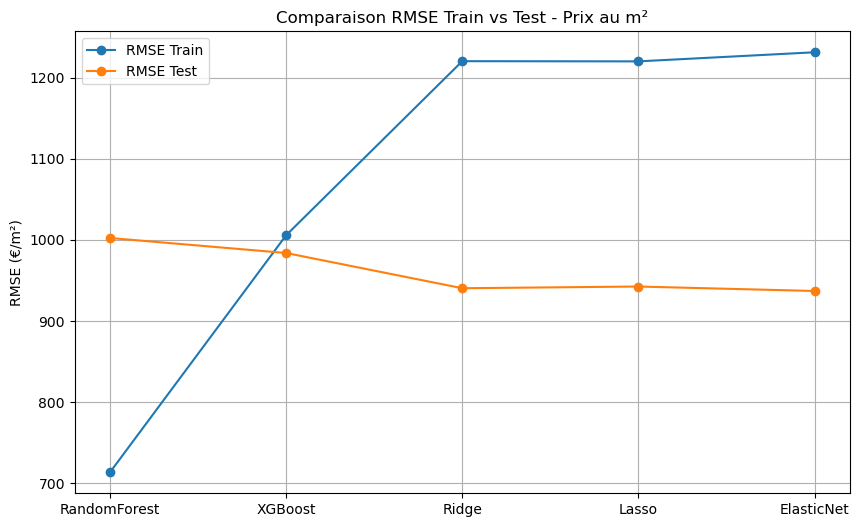

In [54]:
import matplotlib.pyplot as plt

models = ['RandomForest', 'XGBoost', 'Ridge', 'Lasso', 'ElasticNet']
rmse_train = [713.6, 1005.7, 1220.2, 1219.96, 1231.17]
rmse_test = [1002.3, 983.8, 940.4, 942.5, 937.0]

plt.figure(figsize=(10,6))
plt.plot(models, rmse_train, marker='o', label='RMSE Train')
plt.plot(models, rmse_test, marker='o', label='RMSE Test')
plt.title('Comparaison RMSE Train vs Test - Prix au m²')
plt.ylabel('RMSE (€/m²)')
plt.grid(True)
plt.legend()
plt.show()